## Title
Insurance Fraud Detection Using Machine Learning And Deep Learning Techniques

## Problem Statement
Quick Insurance Company (QIC) has been facing fraudulent claims for the past couple of years now. Because of this, 30% of their stuffs have been layed off. They accused these people for not paying enough attention when an individual files for a claim. Recently, they had a new CEO called Mr. Debrah. Just after he joined, someone made a fraudulent claim and the person succeded. After this incident, he relized that there has been more cases similar to this one. Enough is enough said Mr. Debrah, I have to put a stop to this act as soon as possible as the new CEO.

I have to contact King (Mr. Debrah's friend who is an IT expect). He called him and they meet later in the day to discuss the situation and measures to put inplace to help him prevent more fraudulent claims from happening in the near futer. I will get back to you said King. A few weeks later, King got back to him telling him of a solution he had in mind. He said, I could come up with a system that can help to detect fraud when someone tries to file for a claim. He explianed everything to Mr. Debrah who was very happy to hear of this new solution. He gave King permission to start as soon as possible by providing him with all the neccessary materials including datasets which contains fraudulent and non fraudulent claims made in the organization (requested by King). The `AIM` of this project is to build the system proposed by King to help Mr. Debrah detect fraudulent claims when a user files for one.


## Evaluation
If we are able to get an accuracy score between 80 and 100 percent and a lower loss value between 0 and 20, then our model is ready to be in production.


## Algorithms To Use
* GradientBoostingClassifier
* LinearDiscriminantAnalysis
* Random Forest Classifier.
* Support Vector Machine.
* ExtraTreesClassifier
* Logistic Regression.
* k-Nearest Neighbors.
* AdaBoostClassifier
* MLPClassifier
* Decision Tree.
* Naive Bayes.
* neural_network


In [6]:
#Import core libris
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Import other tools
import zipfile

In [7]:
#Get Dataset from azure storage account
try:
    
    ## Lets bring in our dataset now
    df=pd.read_csv("../data/fraud_insurance_claims.csv", na_values="?")

except:
    
    # Get incoming dataset
    !wget https://publicimages0.blob.core.windows.net/datasets/Tabular/insurance_fraud_claim/fraud_insurance_claims.zip
    !mv fraud_insurance_claims.zip ../data
    data=zipfile.ZipFile("../data/fraud_insurance_claims.zip")
    data.extractall("../data/")
    data.close()
    
    ## Lets bring in our dataset now
    df=pd.read_csv("../data/fraud_insurance_claims.csv", na_values="?")

In [32]:
# Allow display of all features in dataset
pd.set_option('display.max_columns', None)

# Display databaset if download successfully
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25 00:00:00,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21 00:00:00,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22 00:00:00,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10 00:00:00,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17 00:00:00,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [37]:
#Get column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [38]:
#Lets check total number of sample in each fraud_report feature
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

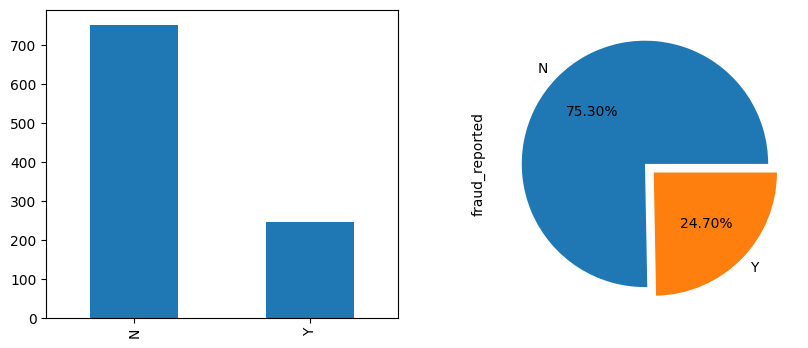

In [39]:
#lets visualize our results
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
df.fraud_reported.value_counts().plot(kind="bar")

plt.subplot(1, 2, 2)
df.fraud_reported.value_counts().plot(kind="pie",autopct="%.2f%%", explode=[0.0, 0.1])
plt.show()